## Sleep apnea exploratory analysis

In [1]:
# import 
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import time 
%matplotlib inline 
import matplotlib.pyplot as plt 
from sympy.logic.boolalg import Nor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import math

In [2]:
# load csv file 
load_file = '/Users/farahshamout/Desktop/RAIL/data.csv'
data = pd.read_csv(load_file)
data.head()

,gender,ethnicity,term,bmi,age,allergies,asthma,gerd,tonsilsize,nrem,...,tst50co2,zscore,ahi,oahi,cai,oai,ohi,lowsao2,peakc02,tb90
0,Male,White,0.0,25.929191,3.093771,Yes,Yes,No,3,75.7,...,0.0,4.920000,2.1,2.0,0.1,0.29,1.71,90,50,0.0
1,Male,Hispanic,0.0,31.462240,4.550308,No,No,No,3,80.6,...,0.0,4.927145,15.8,15.3,0.5,1.33,13.97,86,50,0.3
2,Male,Hispanic,0.0,36.104691,4.678987,Yes,Yes,No,2,75.1,...,83.3,4.990000,28.6,27.8,0.8,0.09,27.71,80,64,2.2
3,Male,Black,0.0,69.219425,16.953425,No,No,No,3,44.7,...,12.4,3.460000,118.0,2.5,0.5,115.50,115.50,64,52,34.2
4,Male,Black,0.0,50.974365,17.120548,No,No,No,3,66.5,...,0.0,3.160000,60.5,42.7,1.4,16.90,16.90,85,47,2.5


In [3]:
data.describe()

,term,bmi,age,tonsilsize,nrem,rem,sleepefficiency,arousali,tst50co2,zscore,ahi,oahi,cai,oai,ohi,lowsao2,peakc02,tb90
count,439.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,0.102506,26.863047,10.508655,2.385965,72.708991,16.980702,81.726096,15.389254,7.815132,1.590278,11.858553,8.698684,0.664474,3.896996,5.417390,88.046053,48.298246,1.407018
std,0.303658,10.561774,4.759669,0.942373,35.218159,6.601057,13.825466,15.924183,19.326153,1.097054,23.614481,16.209962,1.964702,15.446075,16.264809,7.116616,6.134650,6.196213
min,0.000000,14.161674,2.058864,1.000000,22.800000,0.000000,8.300000,1.600000,0.000000,-1.135029,0.000000,0.000000,0.000000,-0.200000,0.000000,51.000000,32.000000,0.000000
25%,0.000000,17.922654,5.823409,2.000000,68.000000,13.400000,75.700000,7.800000,0.000000,0.933396,0.900000,0.600000,0.000000,0.000000,0.000000,86.000000,44.000000,0.000000
50%,0.000000,24.472229,12.073973,2.000000,72.600000,17.800000,85.450000,10.850000,0.000000,1.883140,3.400000,2.600000,0.200000,0.200000,0.850000,90.000000,48.000000,0.000000
75%,0.000000,33.120368,14.447945,3.000000,76.900000,21.125000,91.625000,16.125000,1.400000,2.416769,11.225000,9.400000,0.600000,1.592500,3.720000,92.250000,52.000000,0.225000
max,1.000000,72.797430,17.954826,4.000000,793.700000,31.100000,99.000000,128.800000,99.600000,4.990000,187.700000,124.700000,31.000000,188.500000,188.500000,98.000000,80.000000,64.000000


In [4]:
# Remove all text from data (i.e. binarize Yes/No, female/Male, and categorize ethnicity)
# Parse through data and change variables as follows:
    # gender: 1 = female, 0 = male
    # ethnicity: 1 = White, 2 = Hispanic, 3 = Black, 4 = Asian
    # Allergies: 1 = Yes, 0 = No
    # Asthma: 1 = Yes, 0 = No
    # Gerd: 1 = Yes, 0 = No

# Term contains Nan value so take all rows where term is not NaN
data = data[np.isfinite(data['term'])]

# Replace strings with binary values / disrete values for multivalued columns
obs = data.replace(to_replace = ['Yes', 'No', 'Male','Female', 'White','Hispanic', 'Black', 'Asian']
                   , value = [ 1.0,0.0,0.0,1.0,1.0,2.0,3.0,4.0])

# Create a subset of obs that contains only initial data before sleep test
cols = ['gender','ethnicity','term', 'bmi','age','allergies','asthma','gerd','tonsilsize', 'ahi']
init_obs = obs

# DATA SUMMARY:
    # data with original data 
    # obs with all numerical values
    # init_obs with initial observations before sleep-test i.e. variables from gender to tonsilsize
init_obs.head()

,gender,ethnicity,term,bmi,age,allergies,asthma,gerd,tonsilsize,nrem,...,tst50co2,zscore,ahi,oahi,cai,oai,ohi,lowsao2,peakc02,tb90
0,0.0,1.0,0.0,25.929191,3.093771,1.0,1.0,0.0,3,75.7,...,0.0,4.920000,2.1,2.0,0.1,0.29,1.71,90,50,0.0
1,0.0,2.0,0.0,31.462240,4.550308,0.0,0.0,0.0,3,80.6,...,0.0,4.927145,15.8,15.3,0.5,1.33,13.97,86,50,0.3
2,0.0,2.0,0.0,36.104691,4.678987,1.0,1.0,0.0,2,75.1,...,83.3,4.990000,28.6,27.8,0.8,0.09,27.71,80,64,2.2
3,0.0,3.0,0.0,69.219425,16.953425,0.0,0.0,0.0,3,44.7,...,12.4,3.460000,118.0,2.5,0.5,115.50,115.50,64,52,34.2
4,0.0,3.0,0.0,50.974365,17.120548,0.0,0.0,0.0,3,66.5,...,0.0,3.160000,60.5,42.7,1.4,16.90,16.90,85,47,2.5


In [5]:
# Initial statistics i.e. gender, age, and investigations of asthma, allergies and gerd 
# Note that:
    #AAG refers to asthma AND allergies AND gerd
    
stats_labels = ['% of patient cohort', 
                'Average age', 
                '% OSA (ahi>5)', 
                '%allergies ',
                '%allergies AND OSA',
                '%asthma', 
                '%asthma AND OSA',
                '%gerd ',
                '% gerd AND OSA',
                '% AAG',                
                '% AAG AND OSA']
data_male = data.loc[data['gender'] == 'Male']
data_female = data.loc[data['gender'] == 'Female']
init_stats_dict = {'All': [100, 
                           data['age'].mean(), 
                           len(data.loc[data['ahi']>5])*100/len(data),
                           len(data.loc[data['allergies']=='Yes'])*100/len(data), 
                           len(data.loc[(data['allergies']=='Yes') & (data['ahi']>5)])*100/len(data), 
                           len(data.loc[data['asthma']=='Yes'])*100/len(data), 
                           len(data.loc[(data['asthma']=='Yes')& (data['ahi']>5)])*100/len(data), 
                           len(data.loc[data['gerd']=='Yes'])*100/len(data),
                           len(data.loc[(data['gerd']=='Yes')& (data['ahi']>5)])*100/len(data),
                           len(data.loc[(data['gerd']=='Yes')& (data['asthma']=='Yes') & (data['allergies']=='Yes')])*100/len(data),
                           len(data.loc[(data['gerd']=='Yes')& (data['asthma']=='Yes') & (data['allergies']=='Yes') &(data['ahi']>5)])*100/len(data)], 
                   'Females':[len(data_female)*100/len(data), 
                            data_female['age'].mean(), 
                            len(data_female.loc[data_female['ahi']>5])*100/len(data_female),
                            len(data_female.loc[data_female['allergies']=='Yes'])*100/len(data_female), 
                            len(data_female.loc[(data_female['allergies']=='Yes')& (data_female['ahi']>5)])*100/len(data_female),
                            len(data_female.loc[data_female['asthma']=='Yes'])*100/len(data_female), 
                            len(data_female.loc[(data_female['asthma']=='Yes') & (data_female['ahi']>5)])*100/len(data_female), 
                            len(data_female.loc[data_female['gerd']=='Yes'])*100/len(data_female),
                            len(data_female.loc[(data_female['gerd']=='Yes') & (data_female['ahi']>5)])*100/len(data_female),
                            len(data_female.loc[(data_female['gerd']=='Yes')& (data_female['asthma']=='Yes') & (data_female['allergies']=='Yes')])*100/len(data_female), 
                            len(data_female.loc[(data_female['gerd']=='Yes')& (data_female['asthma']=='Yes') & (data_female['allergies']=='Yes') &(data_female['ahi']>5)])*100/len(data_female)], 
                   'Males':[len(data_male)*100/len(data), 
                            data_male['age'].mean(), 
                            len(data_male.loc[data_male['ahi']>5])*100/len(data_male),
                            len(data_male.loc[data_male['allergies']=='Yes'])*100/len(data_male), 
                            len(data_male.loc[(data_male['allergies']=='Yes')& (data_male['ahi']>5)])*100/len(data_male), 
                            len(data_male.loc[data_male['asthma']=='Yes'])*100/len(data_male),
                            len(data_male.loc[(data_male['asthma']=='Yes') & (data_male['ahi']>5)])*100/len(data_male),
                            len(data_male.loc[data_male['gerd']=='Yes'])*100/len(data_male),
                            len(data_male.loc[(data_male['gerd']=='Yes')& (data_male['ahi']>5)])*100/len(data_male),
                            len(data_male.loc[(data_male['gerd']=='Yes')& (data_male['asthma']=='Yes') & (data_male['allergies']=='Yes')])*100/len(data_male), 
                            len(data_male.loc[(data_male['gerd']=='Yes')& (data_male['asthma']=='Yes') & (data_male['allergies']=='Yes') & (data_male['ahi']>5)])*100/len(data_male)], 
                  }
init_stats_df = pd.DataFrame(init_stats_dict, index = stats_labels )

init_stats_df

,All,Females,Males
% of patient cohort,100.000000,47.608200,52.391800
Average age,10.641929,10.905582,10.402349
% OSA (ahi>5),41.002278,36.842105,44.782609
%allergies,35.990888,38.277512,33.913043
%allergies AND OSA,14.806378,14.832536,14.782609
%asthma,28.929385,25.837321,31.739130
%asthma AND OSA,11.161731,8.612440,13.478261
%gerd,7.289294,6.220096,8.260870
% gerd AND OSA,2.050114,1.913876,2.173913
% AAG,3.416856,3.349282,3.478261


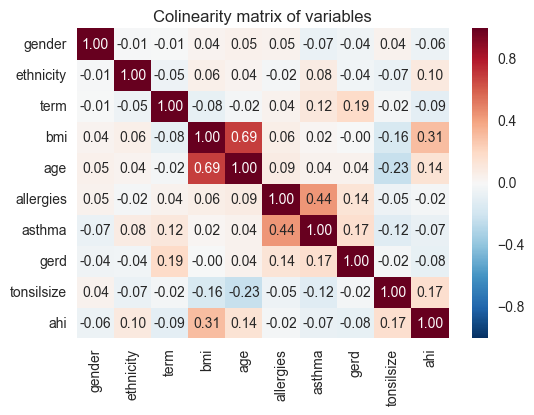

In [7]:
# Analyze colinearity of features and plot heatmap of corresponding values
cols = ['gender','ethnicity','term', 'bmi','age','allergies','asthma','gerd','tonsilsize', 'ahi']
cm = np.corrcoef(obs[cols].values.T)
hm = sns.heatmap(cm, cbar = True, annot = True, fmt = '.2f', annot_kws={'size':10}, yticklabels = cols, xticklabels = cols)
plt.title('Colinearity matrix of variables')
plt.savefig('colinearity_matrix.png', bbox_inches='tight')
plt.show()


## Variables Causality
<img src="files/Variables_causality.png">

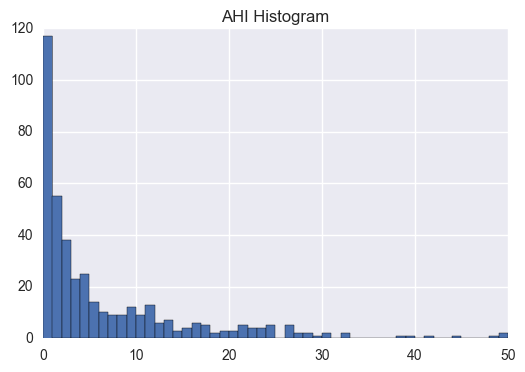

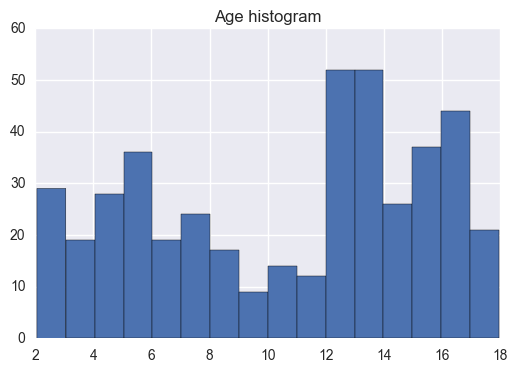

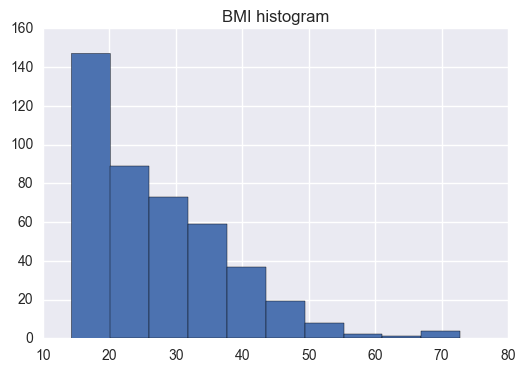

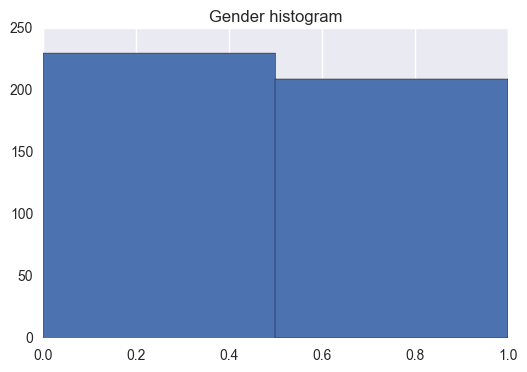

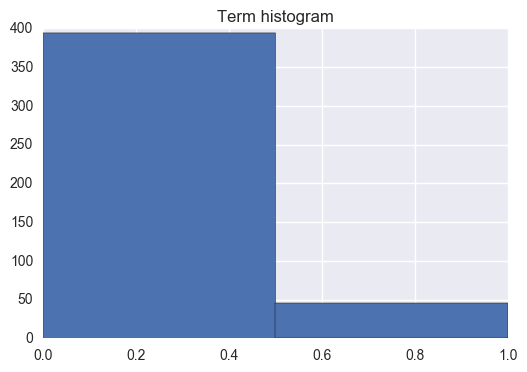

In [16]:
# Variables histogram
plt.hist(init_obs['ahi'], 50, range = (0, 50))
plt.title('AHI Histogram')
plt.show()

plt.hist(init_obs['age'], 16)
plt.title('Age histogram')
plt.show()

plt.hist(init_obs['bmi'])
plt.title('BMI histogram')
plt.show()

plt.hist(init_obs['gender'], 2)
plt.title('Gender histogram')
plt.show()

plt.hist(init_obs['term'],2)
plt.title('Term histogram')
plt.show()

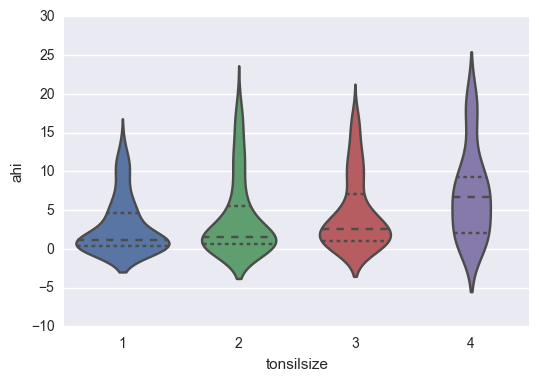

In [17]:
# Investigation of tonsil size and ahi 
tons = sns.violinplot(x='tonsilsize', y='ahi', data=data.loc[data['ahi']<20], inner = 'quartile')

## 1) Gaussian Bayesian Model
This model assumes the likelihood of the features is Gaussian (for continuous variables)

In [19]:
# Run on variables with continous distributions 
# Consider our problem as a binary one - as suggested by Amal, to diagnose 
# children with 0 (no apnea<5) or 1 (apnea>5)

# (1) Parse observations to change ahi values accordingly 
data = init_obs
# add an extra column to indicate the boolean value of ahi 
data['bool_ahi'] = data['ahi'].between(5,188)

# (2) Choose continuous independent features according to previous colinearity analysis
cols = ['bmi','tonsilsize', 'term','gender']
        #'gender', 'ethnicity']
    
# (3) Run Gaussian Bayesian assuming Gaussian distributions for variables, to give parameters of model
clf = GaussianNB() 
acc_scores = cross_val_score(clf, data[list(cols)].values, data['bool_ahi'].values, cv=10, scoring ='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (acc_scores.mean(), acc_scores.std() * 2))

#f1_scores = cross_val_score(clf, data[list(cols)].values, data['bool_ahi'].values, cv=10, scoring ='f1')
#print("F1_score: %0.2f (+/- %0.2f)" % (f1_scores.mean(), f1_scores.std() * 2))

auroc_scores = cross_val_score(clf, data[list(cols)].values, data['bool_ahi'].values, cv=10, scoring ='roc_auc')
print("AUROC score: %0.2f (+/- %0.2f)" % (auroc_scores.mean(), auroc_scores.std() * 2))

Accuracy: 0.70 (+/- 0.21)
AUROC score: 0.77 (+/- 0.17)


## 2) Multinomial Bayesian Distribution
Classification with discrete features

In [20]:
# (1) Convert bmi to a discrete variable (add to bin)
def round_10(x):
       return int(math.ceil(x / 10.0)) 

disc_obs = obs
disc_obs['bmi'] = disc_obs['bmi'].apply(round_10)

# add an extra column to indicate the boolean value of ahi 
disc_obs['bool_ahi'] = disc_obs['ahi'].between(5,188)

# (2) Choose continuous independent features according to previous colinearity analysis
cols = ['bmi','tonsilsize', 'term','gender']
        #'gender', 'ethnicity']
    
# (3) Run Multinomial Bayesian assuming for classification with discrete features
clf = MultinomialNB() 
acc_scores = cross_val_score(clf, disc_obs[list(cols)].values, disc_obs['bool_ahi'].values, cv=10, scoring ='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (acc_scores.mean(), acc_scores.std() * 2))

#f1_scores = cross_val_score(clf, disc_obs[list(cols)].values, disc_obs['bool_ahi'].values, cv=10, scoring ='f1')
#print("F1_score: %0.2f (+/- %0.2f)" % (f1_scores.mean(), f1_scores.std() * 2))

auroc_scores = cross_val_score(clf, disc_obs[list(cols)].values, disc_obs['bool_ahi'].values, cv=10, scoring ='roc_auc')
print("AUROC score: %0.2f (+/- %0.2f)" % (auroc_scores.mean(), auroc_scores.std() * 2))

Accuracy: 0.59 (+/- 0.02)
AUROC score: 0.68 (+/- 0.13)
